# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [4]:
data = pd.read_csv('./train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
# Посмотрим на 'n' случайных строчек
data.sample (n = 3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4609,24,19.90,533.5,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
4104,9,49.20,447.9,Male,1,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check,0
2888,68,19.35,1292.65,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0


In [7]:
# Поработав с датафреймом я узнал что в нём есть пустые значения ' ', заменим их на np.nan.
data = data.replace(' ', np.nan)

# В цикле пройдём через все столбцы признаков в датафрейме.
for f in feature_cols:
    # В цикле пройдём через все значения в текущем столбце признаков.
    # data.isna() - возвращает True если элемент равен nan и False в обратном случае.
    i = 0 # заведём счётчик чтобы получить индекс каждого nan.
    for d in data.isna()[f]:
        # Пройдём через все элементы датафрейма и при каждом nan будем выводить наименование столбца и индекс элемента nan.
        if d == True:
            print(f,' :', i)
        i +=1
            
# Сбросим все значения nan.
data = data.dropna()

# Так же мы видим что TotalSpent имеет Dtype = object, хотя это числовой признак.
# data.info()
# Исправим это
data['TotalSpent'] = data['TotalSpent'].astype(float)

TotalSpent  : 1048
TotalSpent  : 1707
TotalSpent  : 2543
TotalSpent  : 3078
TotalSpent  : 3697
TotalSpent  : 4002
TotalSpent  : 4326
TotalSpent  : 4551
TotalSpent  : 4598


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

,count
Churn,
0,3889
1,1384


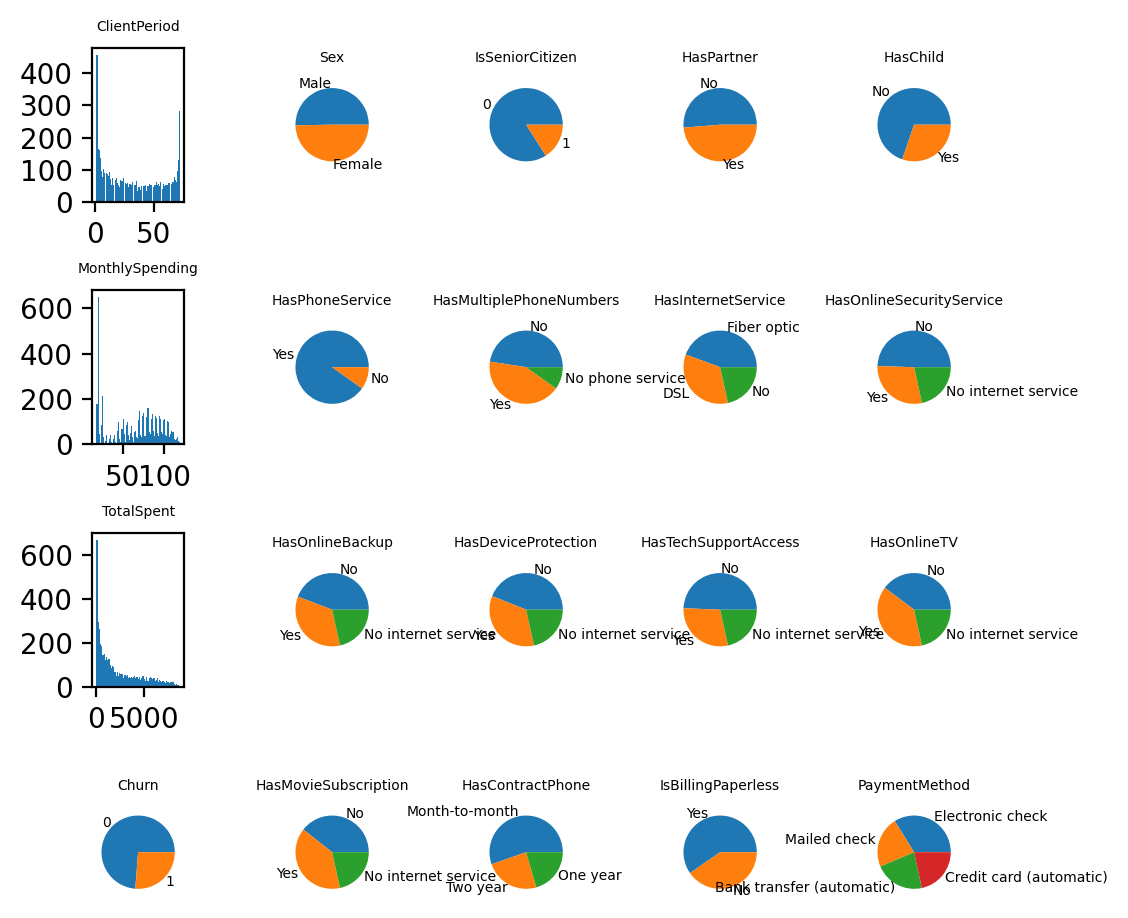

In [8]:
# Формируем поле для графиков.
fig, ax = plt.subplots(nrows=4, ncols=5,figsize=(5,5),dpi=200)
fig.tight_layout()
# Залдаём размер шрифта
plt.rcParams.update({'font.size': 5})

# Нанесём гистограммы для численных признаков в левый столбец.
for i in range(len(num_cols)):
    ax[i][0].hist(data[num_cols[i]], bins=80)
    ax[i][0].set_title(num_cols[i], fontsize=5)

# Для категориальных признаков начертим круговые диаграмы в оставшемся поле справа.
for i in range(4):
    for o in range(4):
        index = i*4+o
        ax[i][o+1].pie(data[cat_cols[index]].value_counts(), labels = data[cat_cols[index]].value_counts().index.tolist())
        ax[i][o+1].set_title(cat_cols[index], fontsize=5)

        
# Для целевой переменной построим график в нижнем левом углу.
ax[3][0].pie(data[target_col].value_counts(), labels = data[target_col].value_counts().index.tolist())
ax[3][0].set_title(target_col, fontsize=5)
# А так же выведем табличку отображающую кол-во элементов каждоно класса.
data[target_col].value_counts().to_frame()
# Откуда видим что элементов 0 класса значительно больше, а если быть точным 0 = 3889 при 1 = 1389, то есть 26.25% к 73.75%.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [9]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [10]:
# Закодируем категориальные признаки.
dummy_features = pd.get_dummies(data[cat_cols])

# Объеденим числовые и закодированые категориальные признаки.
X = pd.concat([data[num_cols], dummy_features], axis = 1)
# Сохраним оригинал.
X_origin = data.iloc[:,:-1]

# Запишем правильные ответы как Y.
Y = pd.concat([data['Churn']], axis = 1)

In [11]:
# Объеденяем преобразования данных (нормализация числовых признаков) и LogisticRegression в один Pipeline.
cls = make_pipeline(
    StandardScaler(),
    LogisticRegression())

# Пропишем параметры GridSearchCV чтобы в дальнейшем обучить модель используя стратегию
# кроссвалидации и посмотреть как разные значения гиперпараметра влияют на обучение модели.
GS_model = GridSearchCV(
    estimator = cls, # Pipeline - (нормализация и LogisticRegression).
    param_grid = {"logisticregression__C": [100, 10, 1, 0.1, 0.01, 0.001]}, # Разные значения гиперпараметра C.
    cv = 5, # Стратегия кроссвалидации.
    scoring = 'roc_auc', # Метрика для оценки модели.
    n_jobs = -1, # Кол-во потоков обучения.
    verbose = 10) # Период отображания прогресса обучения.

# Обучим модель.
GS_model.fit(X,Y.to_numpy().ravel())



# Теперь мы видим что лучший гиперпараметр C = 100,
best_params = GS_model.best_params_
# который даёт среднее значение при кроссвалидации для метрики roc_auc = 0.84481624
means = GS_model.cv_results_['mean_test_score']

best_params, means

Fitting 5 folds for each of 6 candidates, totalling 30 fits


({'logisticregression__C': 100},
 array([0.84481624, 0.84481437, 0.84478866, 0.84391061, 0.84171359,
        0.83731025]))

Выпишите какое лучшее качество и с какими параметрами вам удалось получить:

## Теперь мы видим что лучший гиперпараметр C = 100,
## который даёт среднее значение при кроссвалидации для метрики roc_auc = 0.84481624

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [14]:
# Установите catboost.
# !pip install catboost
# pip install catboost-widget

In [15]:
import catboost

In [16]:
# Разделим датасет.
X_tr, X_te, Y_tr, Y_te = train_test_split(X_origin.values, Y.values, train_size = 0.8)

In [17]:
# Категориальные признаки (индексы).
cat_cols_indices = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

# Тестируем cо стандартными параметрами.
boosting_model = catboost.CatBoostClassifier(cat_features = cat_cols_indices, num_trees=1000, l2_leaf_reg = 0.631578947368421)

boosting_model.fit(X_tr, Y_tr)

Y_train_predicted = boosting_model.predict_proba(X_tr)[:, 1]
Y_test_predicted = boosting_model.predict_proba(X_te)[:, 1]

# Результат ROC-AUC для тренировочной выборки:0.9265731329939269.
# Результат ROC-AUC для тестовой выборки:0.832319134550372.

0:	learn: 0.6753052	total: 190ms	remaining: 3m 10s
1:	learn: 0.6583960	total: 212ms	remaining: 1m 45s
2:	learn: 0.6449385	total: 223ms	remaining: 1m 14s
3:	learn: 0.6306659	total: 236ms	remaining: 58.9s
4:	learn: 0.6176570	total: 249ms	remaining: 49.5s
5:	learn: 0.6058491	total: 259ms	remaining: 42.9s
6:	learn: 0.5939212	total: 270ms	remaining: 38.3s
7:	learn: 0.5836780	total: 277ms	remaining: 34.4s
8:	learn: 0.5749025	total: 282ms	remaining: 31s
9:	learn: 0.5640489	total: 291ms	remaining: 28.8s
10:	learn: 0.5548851	total: 306ms	remaining: 27.5s
11:	learn: 0.5459318	total: 316ms	remaining: 26s
12:	learn: 0.5368184	total: 326ms	remaining: 24.8s
13:	learn: 0.5287676	total: 338ms	remaining: 23.8s
14:	learn: 0.5214196	total: 349ms	remaining: 22.9s
15:	learn: 0.5146993	total: 359ms	remaining: 22.1s
16:	learn: 0.5083519	total: 368ms	remaining: 21.3s
17:	learn: 0.5028988	total: 380ms	remaining: 20.7s
18:	learn: 0.4970011	total: 390ms	remaining: 20.1s
19:	learn: 0.4921809	total: 401ms	remainin

482:	learn: 0.3326564	total: 17.2s	remaining: 18.5s
483:	learn: 0.3326080	total: 17.3s	remaining: 18.4s
484:	learn: 0.3324643	total: 17.3s	remaining: 18.4s
485:	learn: 0.3322393	total: 17.4s	remaining: 18.4s
486:	learn: 0.3321921	total: 17.4s	remaining: 18.3s
487:	learn: 0.3320714	total: 17.4s	remaining: 18.3s
488:	learn: 0.3319543	total: 17.5s	remaining: 18.2s
489:	learn: 0.3319259	total: 17.5s	remaining: 18.2s
490:	learn: 0.3315752	total: 17.5s	remaining: 18.2s
491:	learn: 0.3313237	total: 17.6s	remaining: 18.1s
492:	learn: 0.3313210	total: 17.6s	remaining: 18.1s
493:	learn: 0.3311836	total: 17.6s	remaining: 18s
494:	learn: 0.3311571	total: 17.6s	remaining: 18s
495:	learn: 0.3308034	total: 17.7s	remaining: 18s
496:	learn: 0.3305813	total: 17.7s	remaining: 17.9s
497:	learn: 0.3305464	total: 17.7s	remaining: 17.9s
498:	learn: 0.3301400	total: 17.8s	remaining: 17.9s
499:	learn: 0.3299966	total: 17.8s	remaining: 17.8s
500:	learn: 0.3297452	total: 17.8s	remaining: 17.8s
501:	learn: 0.3295

645:	learn: 0.3087988	total: 23.4s	remaining: 12.8s
646:	learn: 0.3085728	total: 23.4s	remaining: 12.8s
647:	learn: 0.3085413	total: 23.5s	remaining: 12.7s
648:	learn: 0.3082829	total: 23.5s	remaining: 12.7s
649:	learn: 0.3082583	total: 23.5s	remaining: 12.7s
650:	learn: 0.3080731	total: 23.6s	remaining: 12.6s
651:	learn: 0.3076629	total: 23.6s	remaining: 12.6s
652:	learn: 0.3075126	total: 23.6s	remaining: 12.6s
653:	learn: 0.3072659	total: 23.7s	remaining: 12.5s
654:	learn: 0.3072129	total: 23.7s	remaining: 12.5s
655:	learn: 0.3070256	total: 23.8s	remaining: 12.5s
656:	learn: 0.3069239	total: 23.8s	remaining: 12.4s
657:	learn: 0.3067373	total: 23.8s	remaining: 12.4s
658:	learn: 0.3064519	total: 23.9s	remaining: 12.3s
659:	learn: 0.3063796	total: 23.9s	remaining: 12.3s
660:	learn: 0.3063538	total: 23.9s	remaining: 12.3s
661:	learn: 0.3062345	total: 24s	remaining: 12.2s
662:	learn: 0.3060512	total: 24s	remaining: 12.2s
663:	learn: 0.3058891	total: 24s	remaining: 12.2s
664:	learn: 0.3056

808:	learn: 0.2858032	total: 29.6s	remaining: 6.99s
809:	learn: 0.2855793	total: 29.7s	remaining: 6.96s
810:	learn: 0.2854822	total: 29.7s	remaining: 6.92s
811:	learn: 0.2852892	total: 29.7s	remaining: 6.89s
812:	learn: 0.2851431	total: 29.8s	remaining: 6.85s
813:	learn: 0.2850836	total: 29.8s	remaining: 6.81s
814:	learn: 0.2848462	total: 29.9s	remaining: 6.78s
815:	learn: 0.2847344	total: 29.9s	remaining: 6.74s
816:	learn: 0.2845557	total: 29.9s	remaining: 6.7s
817:	learn: 0.2842403	total: 30s	remaining: 6.67s
818:	learn: 0.2842173	total: 30s	remaining: 6.63s
819:	learn: 0.2840522	total: 30s	remaining: 6.59s
820:	learn: 0.2839336	total: 30.1s	remaining: 6.56s
821:	learn: 0.2838547	total: 30.1s	remaining: 6.52s
822:	learn: 0.2837696	total: 30.2s	remaining: 6.49s
823:	learn: 0.2836297	total: 30.2s	remaining: 6.45s
824:	learn: 0.2835711	total: 30.2s	remaining: 6.41s
825:	learn: 0.2835398	total: 30.3s	remaining: 6.37s
826:	learn: 0.2834395	total: 30.3s	remaining: 6.34s
827:	learn: 0.28324

967:	learn: 0.2666273	total: 37.6s	remaining: 1.24s
968:	learn: 0.2665130	total: 37.6s	remaining: 1.2s
969:	learn: 0.2664896	total: 37.7s	remaining: 1.17s
970:	learn: 0.2664437	total: 37.7s	remaining: 1.13s
971:	learn: 0.2663388	total: 37.8s	remaining: 1.09s
972:	learn: 0.2661244	total: 37.9s	remaining: 1.05s
973:	learn: 0.2660805	total: 37.9s	remaining: 1.01s
974:	learn: 0.2657997	total: 38s	remaining: 976ms
975:	learn: 0.2657523	total: 38.1s	remaining: 937ms
976:	learn: 0.2655358	total: 38.2s	remaining: 898ms
977:	learn: 0.2653517	total: 38.2s	remaining: 860ms
978:	learn: 0.2652489	total: 38.3s	remaining: 821ms
979:	learn: 0.2651171	total: 38.3s	remaining: 782ms
980:	learn: 0.2650020	total: 38.4s	remaining: 744ms
981:	learn: 0.2649628	total: 38.4s	remaining: 705ms
982:	learn: 0.2648316	total: 38.5s	remaining: 667ms
983:	learn: 0.2646662	total: 38.6s	remaining: 628ms
984:	learn: 0.2645895	total: 38.7s	remaining: 589ms
985:	learn: 0.2644974	total: 38.7s	remaining: 550ms
986:	learn: 0.2

In [18]:
# Отценим boosting_model.
roc_auc_score(Y_tr, Y_train_predicted), roc_auc_score(Y_te, Y_test_predicted)

(0.9202744493631079, 0.8551802658396965)

In [19]:
# Прогоним boosting_model через grid_search чтобы получить лучшие параметры.
boosting_model = catboost.CatBoostClassifier(n_estimators = 500, silent = True,
                                             cat_features = cat_cols_indices,
                                            eval_metric = 'AUC')
boosting_model.grid_search({'l2_leaf_reg': np.linspace(0, 1, 20)},
                          X_origin, Y, plot = True, refit = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8631508842
bestIteration = 132

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8631509	best: 0.8631509 (0)	total: 5.77s	remaining: 1m 49s

bestTest = 0.8619196477
bestIteration = 147

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8619196	best: 0.8631509 (0)	total: 11.5s	remaining: 1m 43s

bestTest = 0.8630992755
bestIteration = 229

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8630993	best: 0.8631509 (0)	total: 17.3s	remaining: 1m 37s

bestTest = 0.8629542796
bestIteration = 97

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8629543	best: 0.8631509 (0)	total: 23.1s	remaining: 1m 32s



{'params': {'l2_leaf_reg': 0.631578947368421},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
    

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

Параметры:
num_trees=1000
l2_leaf_reg: 0.631578947368421

Результат ROC-AUC для тренировочной выборки:0.9265731329939269.

Результат ROC-AUC для тестовой выборки:0.8349764034859144.

# Предсказания

In [20]:
# best_model = GS_model.best_estimator_
best_model = boosting_model

In [21]:
X_test = pd.read_csv('./test.csv')
X_test = X_test.replace(' ', 0)
X_test['TotalSpent'] = X_test['TotalSpent'].astype(float)

# Закодируем категориальные признаки.
dummy_features_2 = pd.get_dummies(X_test[cat_cols])

# Объеденим числовые и закодированые категориальные признаки.
X_test = pd.concat([X_test[num_cols], dummy_features_2], axis = 1)

submission = pd.read_csv('./submission.csv')
submission = submission.drop('Id', axis=1)

# Запишем предсказания в датафрейм.
# sklearn
# dfo = pd.DataFrame(data=best_model.predict_proba(X_test))
# catboost
dfo = pd.DataFrame(data=best_model.predict_proba(pd.read_csv('./test.csv').replace(' ', 0)))
# Запишем предсказания в файл.
submission['Churn'] = dfo[1]
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.